In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['Dates'])
test = pd.read_csv('data/test.csv', parse_dates=['Dates'])
train.shape, test.shape

((878049, 9), (884262, 7))

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
test = test.set_index("Id")
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [6]:
df = pd.concat([train, test])
df.shape

(1762311, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762311 entries, 0 to 884261
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Dates       datetime64[ns]
 1   Category    object        
 2   Descript    object        
 3   DayOfWeek   object        
 4   PdDistrict  object        
 5   Resolution  object        
 6   Address     object        
 7   X           float64       
 8   Y           float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 134.5+ MB


In [8]:
df["year"] = df["Dates"].dt.year
df["month"] = df["Dates"].dt.month
df["day"] = df["Dates"].dt.day
df["hour"] = df["Dates"].dt.hour
df["dayofweek"] = df["Dates"].dt.dayofweek

In [9]:
df["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

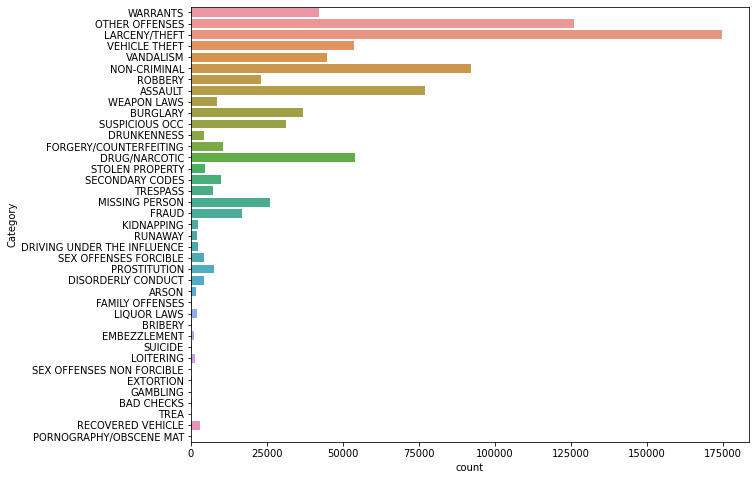

In [10]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y="Category")

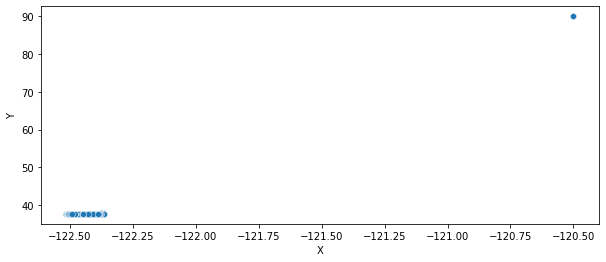

In [11]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x="X", y="Y")

In [12]:
# 경위도가 잘못 입력된 데이터 수
df[df["Y"] > 80].shape

(143, 14)

In [13]:
# 경위도가 잘못 입력된 데이터 수
train[train["Y"] > 80].shape

(67, 9)

In [14]:
# 경위도가 잘못 입력된 데이터 수
test[test["Y"] > 80].shape

(76, 6)

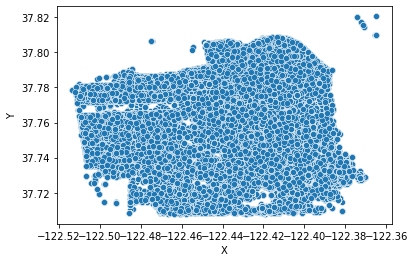

In [15]:
sns.scatterplot(data=df[df["Y"] < 80], x="X", y="Y")

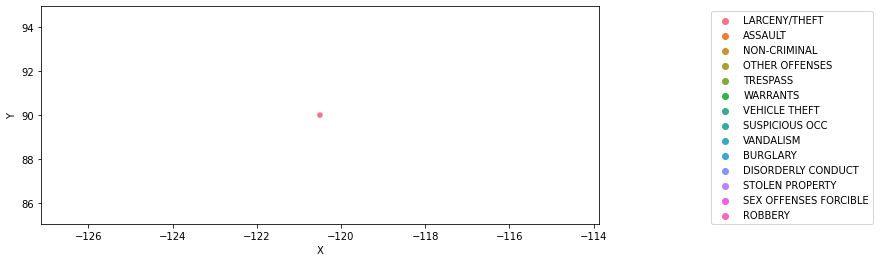

In [16]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=train[train["Y"] > 80], x="X", y="Y", hue="Category")
plt.legend(bbox_to_anchor=(1.5, 1))

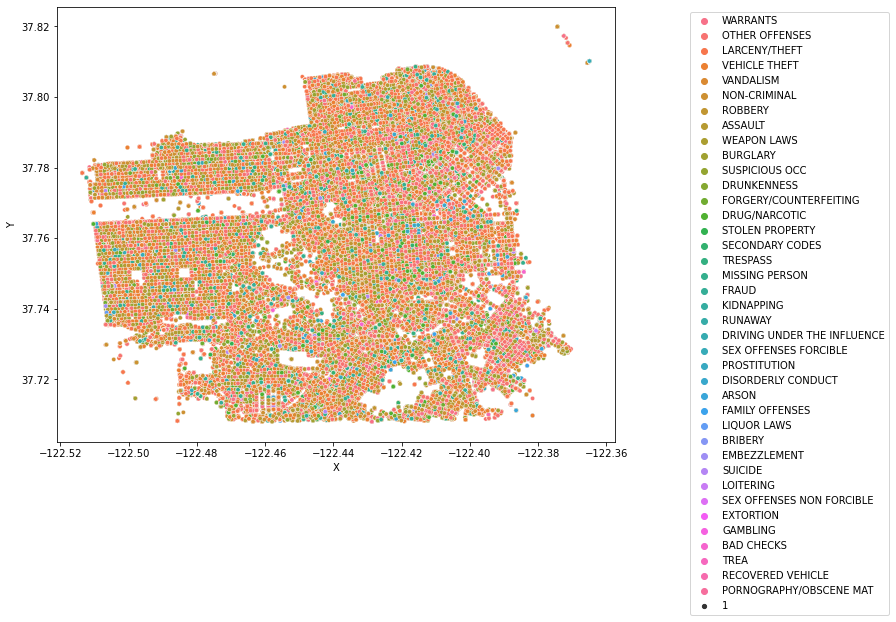

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train[train["Y"] < 80], x="X", y="Y", hue="Category", size=1)
plt.legend(bbox_to_anchor=(1.5, 1))